In [2]:
#Importing all libraries

import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
#Reading data from external link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


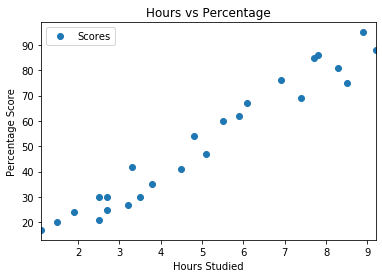

In [4]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From above graph, we can clearly see that there is a positive linear relation between the no of hours studied and percentage of score.

In [5]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [6]:
#Splitting data into training set and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=2020) 

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

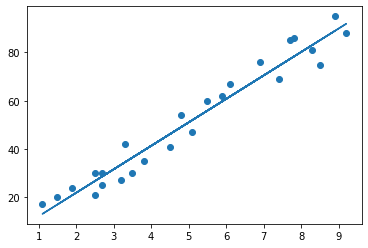

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [9]:
y_pred = regressor.predict(X_test)
y_pred

array([61.69226155, 51.96459646, 69.47439362, 34.4547993 , 46.12799741])

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print( np.sqrt( mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


5.977110590593823
5.894227878821307
0.8236979322335727


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,67,61.692262
1,47,51.964596
2,76,69.474394
3,42,34.454799
4,41,46.127997


In [12]:
# test with data
hr = 9.25
hrs=np.array(hr).reshape(1,-1)
hr_pred = regressor.predict(hrs)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(hr_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.33440658567864
